In [44]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt


In [45]:
train=pd.read_csv('C:/Users/Utilisateur/Documents/PythonScripts/scripts/TitanicML/data/train.csv')
test=pd.read_csv('C:/Users/Utilisateur/Documents/PythonScripts/scripts/TitanicML/data/test.csv')

In [46]:
print(test.shape)
print(train.shape)

(418, 11)
(891, 12)


In [47]:
print(train.head())
print(test.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [48]:
print (train.describe())
print(train.isna().sum())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex  

In [50]:
print(train.info())
print(train.dtypes)
print(train.Embarked.unique())
print(train.Fare.mean())
print(train.Fare.max())
print(train.Fare.min())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
['S' 'C' 'Q' nan]
32.2042079685746
512.3292
0.0


In [36]:
print(test.isna().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


#suppression ou remplacement des valeurs na
#j'ai choisi de remplacer l'age manquant par la valeur médiane

In [37]:
Age2 = train['Age'].median()
print(Age2)
train['Age'].fillna(Age2, inplace=True)

28.0


#je supprime les colonnes Name, Cabin(77% de valeur manquante) et ticket car le numéro n'apporte rien

In [38]:
del train['Cabin']
del train['Ticket']
del train['Name']

Autre façon de supprimer les colonnes inutiles:
train = train.drop(["Name", "Ticket", "Cabin"], axis=1)

# je remplace les 2 valeurs manquantes du port d'embarquement par Southampton qui est le plus eleve

In [39]:
train["Embarked"].value_counts()
train.Embarked=train["Embarked"].fillna("S")
train.info()
print(train.head())
print(train.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB
   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    male  22.0      1      0   7.2500        S
1            2         1       1  female  38.0      1      0  71.2833        C
2            3         1       3  female  26.0      0      0   7.9250        S
3            4         1       1  female  35.0      1      0  53.1000        S
4            5         0       3    male  35.0      0      0   8.0500        S
PassengerId    0
Survived       0
Pclass       

# je fais la même chose pour la partie test

In [11]:
Age3 = test['Age'].median()
print(Age3)
test['Age'].fillna(Age3, inplace=True)


27.0


In [12]:
Fare2 = test['Fare'].mean()
print(Fare2)
test['Fare'].fillna(Fare2, inplace=True)

35.6271884892086


In [13]:
del test['Cabin']
del test['Ticket']
del test['Name']

print(test.head())
print(test.isna().sum())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch     Fare Embarked  
0  34.5      0      0   7.8292        Q  
1  47.0      1      0   7.0000        S  
2  62.0      0      0   9.6875        Q  
3  27.0      0      0   8.6625        S  
4  22.0      1      1  12.2875        S  
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


# Ne pas oublier que la variable cible 'survived' est présente dans le train et
# pas dans le test pour la suite 

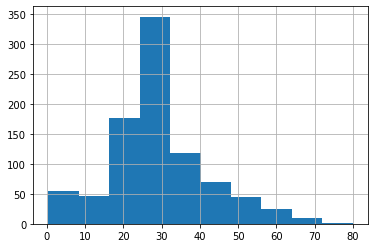

In [14]:
train["Age"].hist()



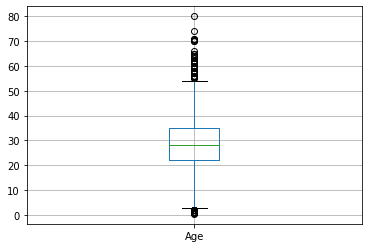

In [15]:
train.boxplot("Age")



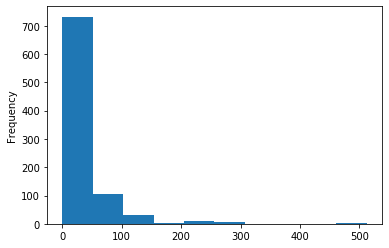

In [16]:
train["Fare"].plot(kind="hist")

In [43]:
# qualitatif
train["Survived"].value_counts()


0    549
1    342
Name: Survived, dtype: int64

In [18]:
train["Pclass"].value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

In [19]:
train["Sex"].value_counts()


male      577
female    314
Name: Sex, dtype: int64

In [20]:
train["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

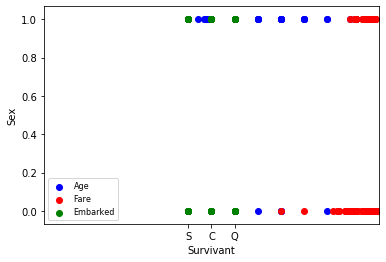

In [21]:
plt.xlabel('Survivant')
plt.ylabel('Sex')
plt.scatter(train['Age'], train['Survived'], color='blue', label='Age')
plt.scatter(train['Fare'], train['Survived'], color='red', label='Fare')
plt.scatter(train['Embarked'], train['Survived'], color='green', label='Embarked')

plt.legend(loc=3, prop={'size':8})
plt.show()

regression logistique envisageable

In [22]:
from statsmodels.graphics.mosaicplot import mosaic

(<Figure size 432x288 with 3 Axes>,
 OrderedDict([(('3', 'male'),
               (0.0, 0.0, 0.5456101165672124, 0.7043730673721674)),
              (('3', 'female'),
               (0.0,
                0.70769532650838,
                0.5456101165672124,
                0.29230467349161987)),
              (('1', 'male'),
               (0.5505606116167173,
                0.0,
                0.24002400240024002,
                0.562938353636028)),
              (('1', 'female'),
               (0.5505606116167173,
                0.5662606127722406,
                0.24002400240024002,
                0.43373938722775934)),
              (('2', 'male'),
               (0.7955351090664623,
                0.0,
                0.20446489093353776,
                0.585006500072223)),
              (('2', 'female'),
               (0.7955351090664623,
                0.5883287592084356,
                0.20446489093353776,
                0.41167124079156425))]))

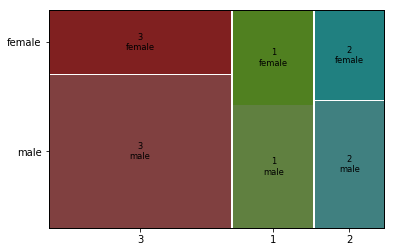

In [65]:
mosaic(train,["Pclass","Sex"])

(<Figure size 432x288 with 3 Axes>,
 OrderedDict([(('0', '3'), (0.0, 0.0, 0.6130961354841952, 0.6731082401476495)),
              (('0', '1'),
               (0.0,
                0.6764194984257951,
                0.6130961354841952,
                0.14475446024680635)),
              (('0', '2'),
               (0.0,
                0.8244852169507472,
                0.6130961354841952,
                0.1755147830492527)),
              (('1', '3'),
               (0.6180712598623047,
                0.0,
                0.38192874013769545,
                0.3456488904380155)),
              (('1', '1'),
               (0.6180712598623047,
                0.34896014871616127,
                0.38192874013769545,
                0.395027303357732)),
              (('1', '2'),
               (0.6180712598623047,
                0.747298710352039,
                0.38192874013769545,
                0.25270128964796096))]))

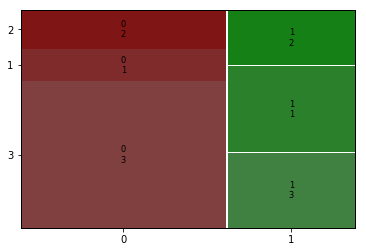

In [23]:
mosaic(train,["Survived","Pclass"])

très peu de survivants en classe 3, moins de morts en classe 1 et 2

(<Figure size 432x288 with 3 Axes>,
 OrderedDict([(('0', 'male'),
               (0.0, 0.0, 0.6130961354841952, 0.8496269266379826)),
              (('0', 'female'),
               (0.0,
                0.8529491857741952,
                0.6130961354841952,
                0.14705081422580474)),
              (('1', 'male'),
               (0.6180712598623047,
                0.0,
                0.38192874013769545,
                0.3176546016203299)),
              (('1', 'female'),
               (0.6180712598623047,
                0.3209768607565425,
                0.38192874013769545,
                0.6790231392434575))]))

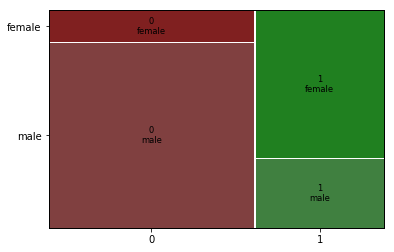

In [24]:
mosaic(train,["Survived","Sex"])

Plus d'hommes morts que de femmes

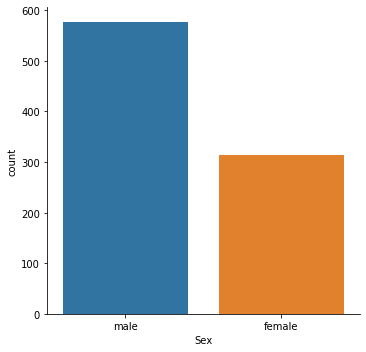

In [40]:
sns.catplot('Sex',data=train,kind='count')

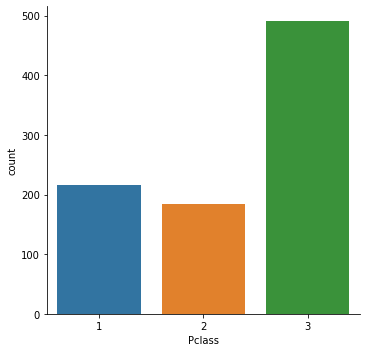

In [41]:
sns.catplot('Pclass',data=train,kind='count')

In [27]:
def titanic_children(passenger):
    
    age , sex = passenger
    if age <16:
        return 'child'
    else:
        return sex

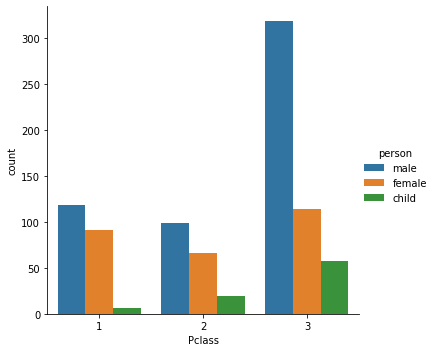

In [42]:
train['person'] = train[['Age','Sex']].apply(titanic_children,axis=1)
train.head(10)
sns.catplot('Pclass',data=train,hue='person',kind='count')

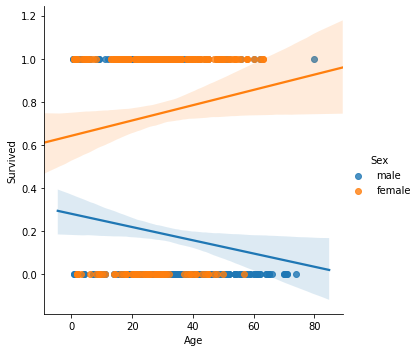

In [29]:
sns.lmplot('Age','Survived',data=train,hue='Sex')

In [ ]:
Données qualitative en quantitatif

person_dummies = pd.get_dummies(train['person'])


embarked_dummies = pd.get_dummies(train['Embarked'])

embarked_dummies.drop('Q',axis=1,inplace=True)

pclass_dummies = pd.get_dummies(train['Pclass'])

pclass_dummies.columns=['class_1','class_2','class_3']